In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

In [7]:
#read in iris as pandas DF
iris = pd.read_table("iris.txt", sep=",")

#make sure the data read in correctly by examining first 5 rows...
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#reduce iris down to just Petal variables
iris_petal = iris[["PetalLength", "PetalWidth"]]
iris_petal.head()


,PetalLength,PetalWidth
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Check out the box and whisker plot to look for outliers (there do not appear to be any).


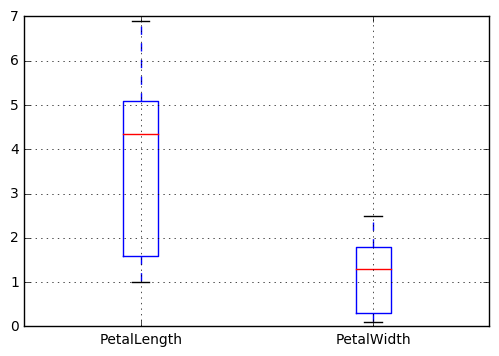

In [16]:
iris_petal.boxplot(return_type="axes")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B7EECC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B92DB00>]], dtype=object)

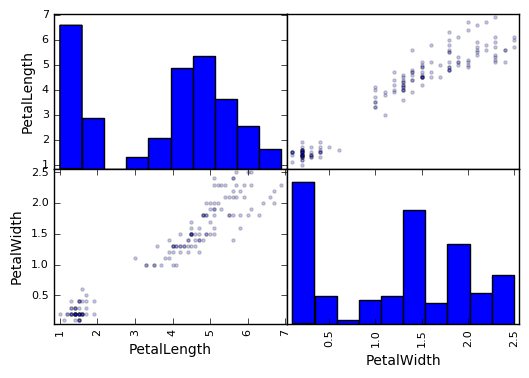

In [15]:
#scatterplot matrix for iris_petal dataset
scatter_matrix(iris_petal, alpha=0.2)



It once again looks there are no outliers in the scatter plots or histograms.

Let's now set up the functions to run a regression equation.

In [9]:
# Create two arrays to store the response and independent variables for regression equation.
indp = iris_petal.as_matrix(columns=['PetalLength'])
response = iris_petal.as_matrix(columns=['PetalWidth'])

In [10]:
def coeff(x,y):
    #create the LSE coefficients using a data frame with dependent, x, and independent, y
    coef = np.linalg.inv((x.T).dot(x)).dot(x.T).dot(y)
    
    return coef

In [17]:
def lineform(x, y):
    #create the LSE regression equation
    
    # creates matrix from x variable such that the first column is the vector 1
    x_ones = np.array([np.ones(len(x)), x[:,0]]).T
   
    #get the intercept using the coeff function
    intercept = coeff(x_ones, y)
    
    x_line = np.linspace(x.min(), x.max(), 2)
    
    return x_line, np.array(intercept[0] + intercept[1] * x_line)

#get the matrix for the iris_petal DF
x_mat, y_mat = lineform(indp, response)

Looks great! Now let's plot our regression equation overlayed over the points from the Iris_Petal DF.

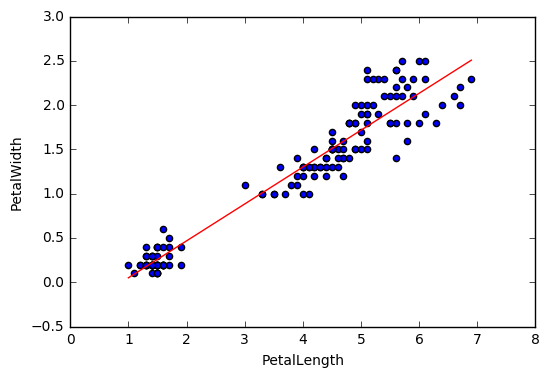

In [29]:
#create a scatterplot of the iris_petal DF
plt.scatter(indp, response)

#label axes
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')

#plot the regression equation 
plt.plot(x_mat, y_mat.T, color='r', label='line of best fit')

#show plot
plt.show()
